In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [5]:
def GBM_MC(S0, r, sigma, T, num_paths):
    """
    dS = r St dt + sigma * St * dW
    d log S = r - .5 sigma^2 dt + sigma
    """
    dt = T / 365
    num_steps = int(T / dt)
    
    # Generate random paths
    paths = np.zeros((num_paths, num_steps + 1))
    
    for i in range(num_paths):
        paths[i, 0] = S0
        for t in range(1, num_steps + 1):
            Z = np.random.normal(0, 1)
            paths[i, t] = paths[i, t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    return paths

In [54]:
def plot_paths(paths, T):
    plt.figure(figsize=(10, 6))
    for i in range(paths.shape[0]):
        plt.plot(np.linspace(0, T, paths.shape[1]), paths[i], lw=1)
    plt.title('Monte Carlo Simulated Paths')
    plt.xlabel('Time (years)')
    plt.ylabel('Stock Price')
    plt.grid()
    plt.show()

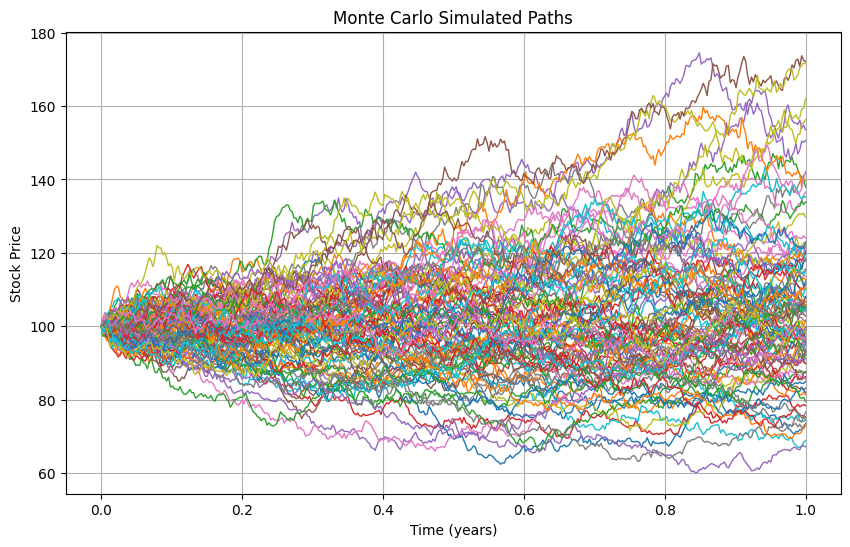

In [ ]:
S0 = 100  # Initial stock price
r = 0.05  # Risk-free rate
sigma = 0.2  # Vol
T = 1     # TTM in years
num_paths = 100  # Num paths
plot_paths(GBM_MC(S0,r, sigma, T, num_paths), T)

In [48]:
def GBM_MC_call(S0, r, sigma, T, num_paths, K):
    """
    dS = r St dt + sigma * St * dW
    d log S = r - .5 sigma^2 dt + sigma
    """
    dt = T / 365
    num_steps = int(T / dt)
    
    # Generate random paths
    paths = np.zeros((num_paths, num_steps + 1))
    pvs = np.zeros((num_paths, 1))
    for i in range(num_paths):
        paths[i, 0] = S0
        for t in range(1, num_steps + 1):
            Z = np.random.normal(0, 1)
            paths[i, t] = paths[i, t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

        pv = np.maximum(paths[i, -1] - K, 0) * np.exp(-r * T)
        pvs[i] = pv    
    return np.mean(pvs)

In [49]:
def GBM_MC_call_efficient(S0, r, sigma, T, num_paths, K):
    """
    dS = r St dt + sigma * St * dW
    d log S = r - .5 sigma^2 dt + sigma
    """
    # Generate random draws from a normal distribution
    Z = np.random.normal(0, 1, num_paths)
    
    # Calculate terminal stock prices
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    
    # Calculate option payoffs
    payoffs = np.maximum(ST - K, 0)
    
    # Discount payoffs to present value and average
    pv = np.mean(payoffs) * np.exp(-r * T)
    
    return pv

In [50]:
def black_scholes_call(S_0, K, sigma, T, r=0.05):
    """
    C = e^-rt [F * N(d1) - K * N(d2)] 
    """
    disc = np.exp(-r * T)
    F = S_0 * np.exp(r * T)
    d1 = np.log(F/K) / (sigma * np.sqrt(T)) + (sigma * np.sqrt(T))/2
    d2 = d1 - sigma * np.sqrt(T)

    return disc * (F * norm.cdf(d1) - K * norm.cdf(d2))

In [53]:
S0 = 100  # Initial stock price
r = 0.05  # Risk-free rate
sigma = 0.2  # Vol
T = 1     # TTM in years
num_paths = 5000  # Num paths
K = 90

GBM_MC_call(S0,r, sigma, T, num_paths, K), black_scholes_call(S0,K,sigma,1), GBM_MC_call_efficient(S0,r, sigma, T, num_paths, K)

(np.float64(16.5829263126207),
 np.float64(16.699448408416007),
 np.float64(16.880247399814763))